# Agenda

1. Copy the image in variable
2. Read the image usinf cv2
3. Display the image
4. Color Color prediction
5. BGR to Gray
6. Rotate
7. Brightness of the image
8. Face Detection
9. Age Detection
10. Changing image to pink color
11. Background color removal
12. Eye extraction

# 1. Copy the image in variable

In [1]:
image_inp = "/kaggle/input/images-4u/ram.jpg"

In [2]:
image_inp

'/kaggle/input/images-4u/ram.jpg'

# # Read the image usinf cv2

In [3]:
import cv2
image_path=image_inp

image = cv2.imread(image_path)

if image is not None:
    print("Image loaded Succefully")
else:
    Print("Error in loading")

Image loaded Succefully


# Display the image

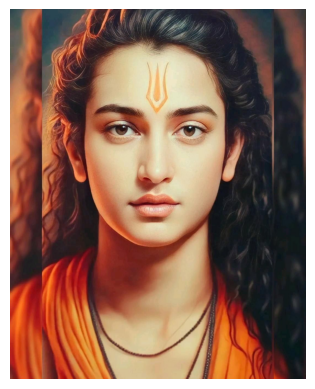

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load the image using OpenCV
image_path = image_inp
image = cv2.imread(image_path)


# Convert the image from BGR to RGB format (OpenCV uses BGR by default)
image_rgb =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')# Turn off the axis
plt.show()

# Color Code Prediction

In [5]:
import cv2
import numpy as np

# Load the image using OpenCV
image_path = image_inp
image = cv2.imread(image_path)

# Convert the image from BGR to RGB format (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Calculate the dominant color using NumPy
dominant_color = np.mean(pixels, axis=0)

# Convert the dominant color to integer values
dominant_color = [int(color) for color in dominant_color]

print("Dominant Color (RGB):", dominant_color)

Dominant Color (RGB): [131, 89, 70]


# BGR to Gray

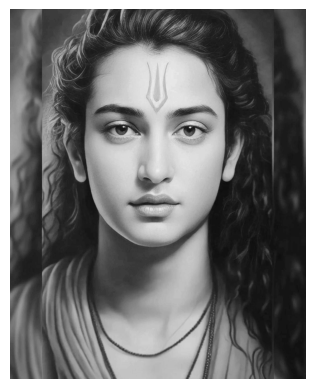

In [6]:
import cv2
from matplotlib import pyplot as plt

# Load the image using OpenCV
image_path = image_inp
image = cv2.imread(image_path)

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

# # Rotate the image

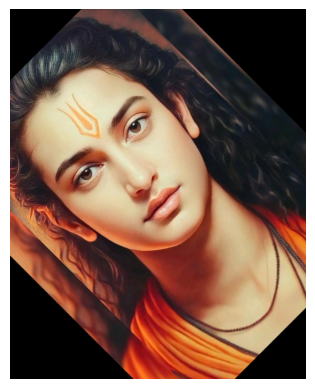

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image using OpenCV
image_path = image_inp
image = cv2.imread(image_path)

# Specify the angle by which you want to rotate the image (in degrees)
angle = 45  # Change this to your desired angle

# Get the height and width of the image
height, width = image.shape[:2]

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the rotated image using matplotlib
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis
plt.show()

In [8]:
import cv2
print(cv2.__version__)

4.9.0


In [9]:
!pip install opencv-python

In [10]:
import cv2
print(cv2.__version__)

4.9.0


# Brightened Image

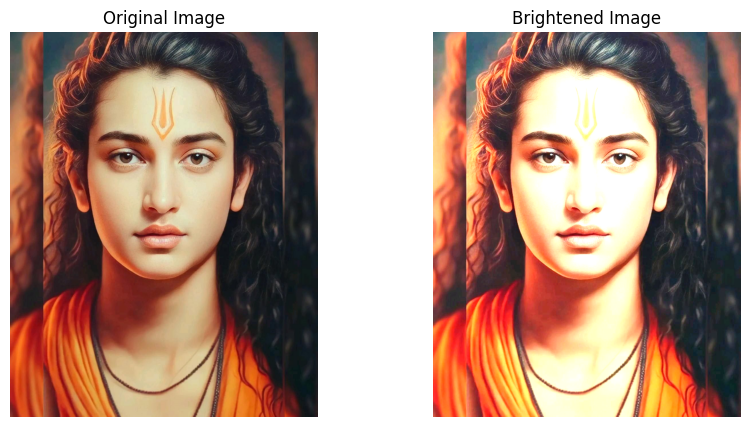

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = image_inp
image = Image.open(image_path)

# Define the brightness factor (adjust as needed)
brightness_factor = 1.5  # Increase this value for a brighter image

# Convert the image to a NumPy array
image_np = np.array(image)

# Increase brightness by multiplying the factor to each channel
brightened_image = np.clip(image_np * brightness_factor, 0, 255).astype(np.uint8)

# Display the original and brightened images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(brightened_image)
plt.axis('off')

plt.show()

#  Face Detection

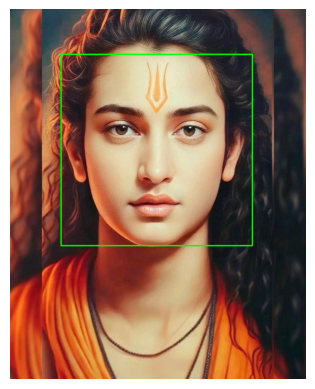

In [12]:
import cv2
from matplotlib import pyplot as plt

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image from your Kaggle dataset or upload one
image_path = image_inp  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the detected faces using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


# Age detection

Estimated Age: Adult or Elderly


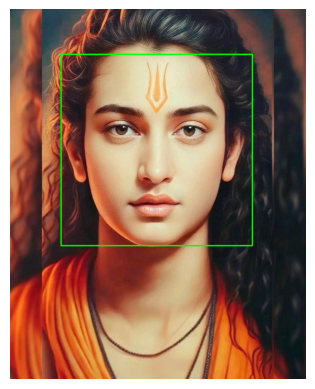

In [13]:
import cv2
import numpy as np

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image for age prediction
image_path = image_inp  # Update the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Initialize an age estimate
age_estimate = None

# If faces are detected, you can use heuristics to estimate age based on facial features
if len(faces) > 0:
    # Assuming the first detected face is the main subject
    (x, y, w, h) = faces[0]
    
    # You can use the size of the detected face as a crude indicator of age
    # Smaller faces might suggest younger ages, while larger faces might suggest older ages
    face_size = w * h
    
    # Define some arbitrary thresholds for age estimation (you can adjust these values)
    if face_size < 10000:
        age_estimate = "Child or Teenager"
    elif 10000 <= face_size < 20000:
        age_estimate = "Young Adult"
    else:
        age_estimate = "Adult or Elderly"

# Display the estimated age
if age_estimate:
    print(f'Estimated Age: {age_estimate}')
else:
    print('No face detected.')

# Display the image with rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the image
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Changing image to pink color

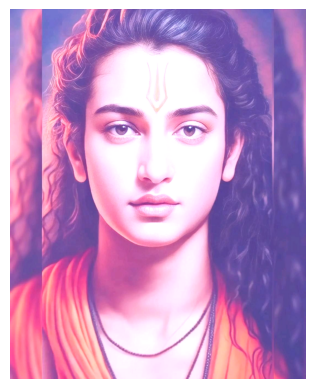

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image = cv2.imread(image_inp)  # Adjust the path to your image

# Create a pink filter by setting high red channel values and lower green and blue channel values
pink_filter = np.zeros_like(image)
pink_filter[:, :, 0] = 255  # Set the red channel to maximum (255)
pink_filter[:, :, 1] = 100  # Set the green channel to a moderate value
pink_filter[:, :, 2] = 150  # Set the blue channel to a moderate value

# Apply the pink filter to the original image
pink_image = cv2.addWeighted(image, 1, pink_filter, 0.5, 0)

# Display the pink image using matplotlib
plt.imshow(cv2.cvtColor(pink_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Remove backgound color

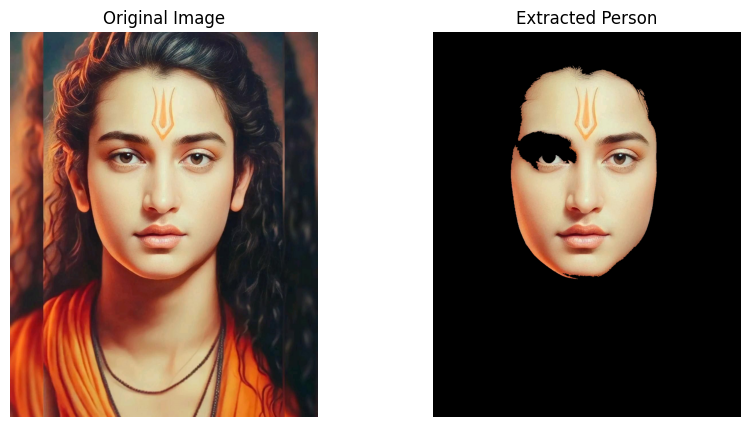

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load your image
image_path = image_inp # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply thresholding to create a binary mask
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary mask
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the person)
largest_contour = max(contours, key=cv2.contourArea)

# Create an empty mask to represent the person
mask = np.zeros_like(thresh)

# Draw the person's contour on the mask
cv2.drawContours(mask, [largest_contour], 0, 200, -2)

# Use the mask to extract the person from the original image
result = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the extracted person
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Extracted Person')
plt.axis('off')

plt.show()


# Eye extraction

(-0.5, 1079.5, 1349.5, -0.5)

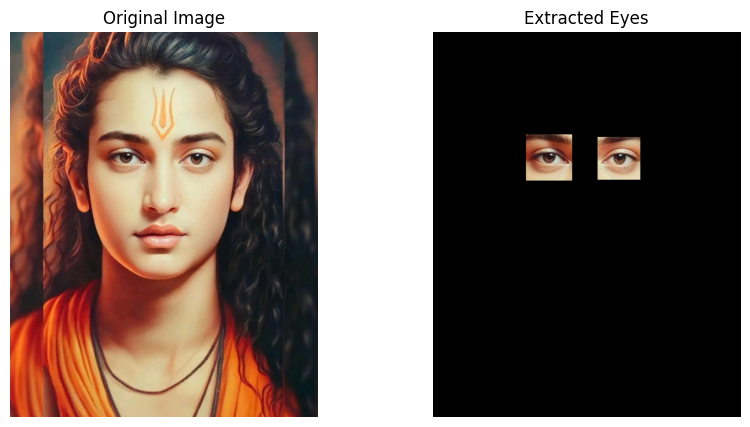

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image
image_path = image_inp  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the pre-trained Haar Cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Detect eyes in the grayscale image
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Create an empty mask for the eyes
eye_mask = np.zeros_like(gray)

# Extract and draw rectangles around the eyes
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(eye_mask, (ex, ey), (ex + ew, ey + eh), 255, -1)

# Use the eye mask to extract the eyes from the original image
extracted_eyes = cv2.bitwise_and(image, image, mask=eye_mask)

# Display the original image and the extracted eyes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extracted_eyes)
plt.title('Extracted Eyes')
plt.axis('off')

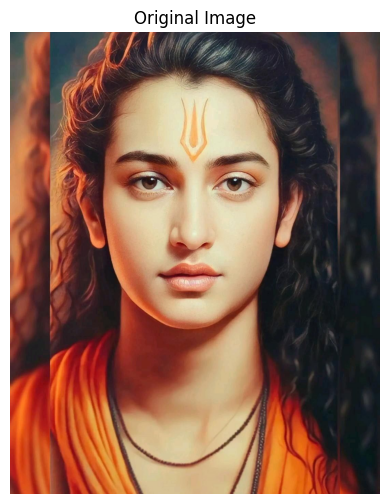

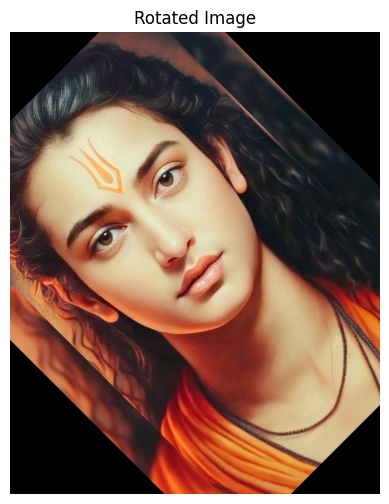

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Replace 'image_inp' with the actual path to your image
image_path = image_inp  
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not loaded. Check the image path.")
else:
    # Convert BGR image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Get the image height and width
    height, width = image.shape[:2]

    # Define the rotation angle (in degrees)
    rotation_angle = 45  # You can adjust this angle as needed

    # Create a rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Convert BGR rotated image to RGB for displaying with matplotlib
    rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

    # Display the rotated image
    plt.figure(figsize=(6, 6))
    plt.imshow(rotated_image_rgb)
    plt.title('Rotated Image')
    plt.axis('off')
    plt.show()